In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
import nltk
nltk.download("stopwords")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

### Data

In [5]:
# from google.colab import drive
# drive.mount('/content/drive')

In [2]:
# FILE_PATH = '/content/drive/MyDrive/nlp/final_questions1.csv'
FILE_PATH = 'final_questions1.csv'

In [7]:
df = pd.read_csv(FILE_PATH, delimiter=';', error_bad_lines=False, names=['physician', 'text'], header=None)

/tmp/ipykernel_356/2463157460.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(FILE_PATH, delimiter=';', error_bad_lines=False, names=['physician', 'text'], header=None)


In [8]:
df

,physician,text
0,психиатр,"Здравствуйте, помогите пожалуйста. Ситуация сл..."
1,диетолог,У меня такая проблема я теряю вес хочу набрать...
2,гинеколог,Здравствуйте! Около 10 месяцев беспокоит зуд в...
3,гастроэнтеролог,Чувство вздутия в левом боку не проходит уже 4...
4,ревматолог,Здравствуйте! у моей мамы ревматоидный артрит ...
...,...,...
31760,инфекционист,"Здравствуйте, примерно 2 месяца назад меня уку..."
31761,дерматолог,Здравствуйте! Беспокоят который год высыпания ...
31762,педиатр,"Дочке 3 месяца.Приготовила смесь ,добавила в н..."
31763,инфекционист,"Здравствуйте, 14 дней назад поцарапала кошка, ..."


In [50]:
physicians = df.physician.unique()
physicians

array(['психиатр', 'диетолог', 'гинеколог', 'гастроэнтеролог',
       'ревматолог', 'хирург-стоматолог', 'педиатр', 'офтальмолог',
       'травматолог', 'кардиолог', 'терапевт', 'венеролог', 'пульмонолог',
       'эндокринолог', 'психолог', 'стоматолог', 'дерматолог', 'маммолог',
       'невролог', 'аллерголог-иммунолог', 'проктолог', 'гепатолог',
       'ортопед', 'детский дерматолог', 'хирург', 'уролог', 'акушер',
       'лор', 'инфекционист', 'гинеколог-эндокринолог', 'covid-19',
       'онколог', 'флеболог', 'нефролог', 'детский невролог', 'гематолог',
       'фтизиатр', 'психотерапевт', 'детский хирург', 'рентгенолог',
       'ветеринар', 'логопед', 'ортодонт', 'детский лор', 'косметолог',
       'нарколог', 'детский гинеколог', 'сосудистый хирург', 'андролог',
       'нейрохирург', 'анестезиолог-реаниматолог', 'сомнолог',
       'детский стоматолог', 'сексолог', 'фармацевт', 'врач кдл',
       'пластический хирург', 'кардиохирург', 'трихолог', 'гомеопат',
       'репродуктолог', 

In [51]:
df.physician.value_counts().to_dict()

{'гинеколог': 3878,
 'педиатр': 3844,
 'терапевт': 2309,
 'невролог': 1898,
 'гастроэнтеролог': 1830,
 'кардиолог': 1421,
 'эндокринолог': 1403,
 'дерматолог': 1105,
 'инфекционист': 934,
 'лор': 902,
 'акушер': 854,
 'офтальмолог': 814,
 'уролог': 785,
 'хирург': 673,
 'ветеринар': 540,
 'онколог': 511,
 'гематолог': 456,
 'детский невролог': 456,
 'психиатр': 449,
 'психолог': 429,
 'пульмонолог': 408,
 'аллерголог-иммунолог': 403,
 'травматолог': 370,
 'стоматолог': 364,
 'детский дерматолог': 340,
 'гинеколог-эндокринолог': 321,
 'психотерапевт': 312,
 'детский лор': 281,
 'covid-19': 275,
 'проктолог': 258,
 'ревматолог': 247,
 'маммолог': 219,
 'венеролог': 215,
 'ортопед': 213,
 'гепатолог': 209,
 'нейрохирург': 204,
 'детский хирург': 144,
 'нефролог': 127,
 'андролог': 123,
 'фтизиатр': 118,
 'врач кдл': 109,
 'детский стоматолог': 91,
 'флеболог': 90,
 'рентгенолог': 81,
 'диетолог': 73,
 'детский гинеколог': 69,
 'сосудистый хирург': 66,
 'нарколог': 60,
 'сексолог': 58,
 'х

<Axes: >

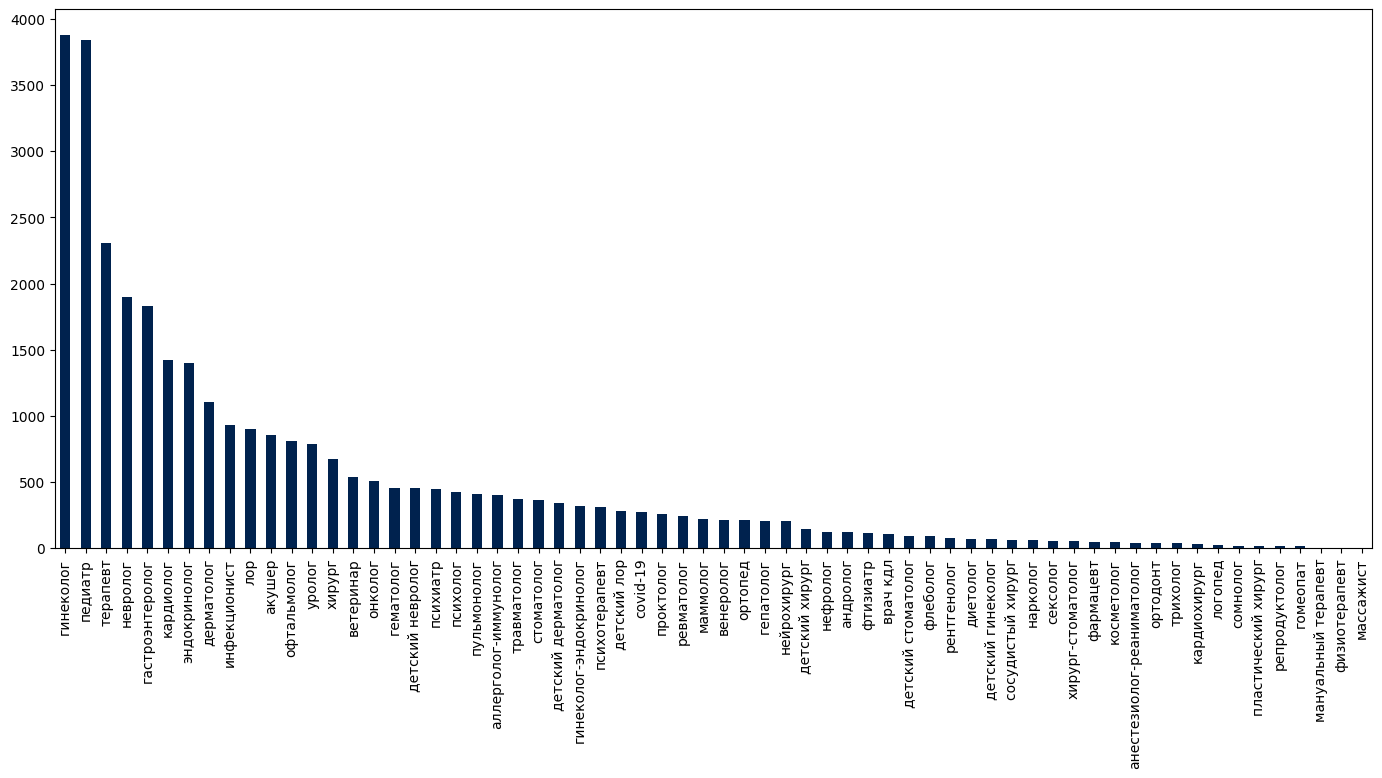

In [52]:
plt.figure(figsize=(17,7))
df.physician.value_counts().plot(kind='bar', colormap = 'cividis')

<Axes: >

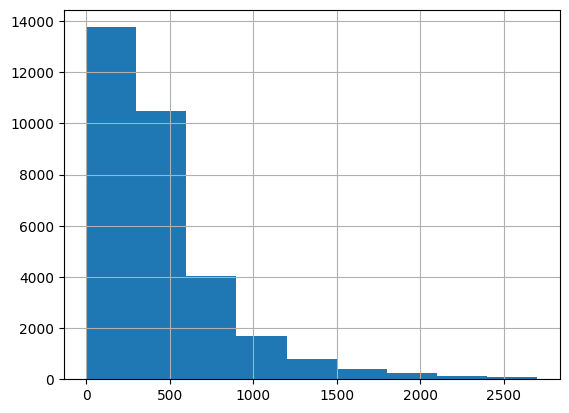

In [53]:
# number of words in text
lens = df.text.str.len()
lens.hist(bins = np.arange(0,3000,300))

### Preprocessing

In [54]:
from nltk.corpus import stopwords
from pymystem3 import Mystem
from string import punctuation

In [55]:
# lemmatizer and stopwords list
mystem = Mystem() 
stopwords = stopwords.words("russian")

In [56]:
def preprocess_text(text):
    tokens = mystem.lemmatize(text.lower())
    tokens = [token for token in tokens if token not in stopwords\
              and token != " " \
              and token.strip() not in punctuation]
    
    text = " ".join(tokens)
    return text

In [57]:
df['text'] = df['text'].map(lambda s: preprocess_text(s))

### Split the data to train and test sets

In [15]:
# from sklearn.model_selection import StratifiedShuffleSplit

# split = StratifiedShuffleSplit(n_splits=4, test_size=0.2, random_state=42)
# split.get_n_splits(df['physician'], df['text'])

In [16]:
# split

In [17]:
# my_tags = df.physician.unique()
# len(my_tags)
# df.physician.count_values()

### Naive Bayes classifier for multinomial models

In [9]:
from sklearn.model_selection import train_test_split

X = df.text
y = df.physician
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)

In [19]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

nb = Pipeline([('vect', CountVectorizer()),
               ('tfidf', TfidfTransformer()),
               ('clf', MultinomialNB()),
              ])
nb.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', MultinomialNB())])

In [20]:
# my_tags__ = y_test.unique()

In [21]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

y_pred = nb.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred, target_names=y_test.unique()))

accuracy 0.3659688336219109
                           precision    recall  f1-score   support

                гинеколог       0.00      0.00      0.00        51
                  педиатр       0.00      0.00      0.00       184
            психотерапевт       0.00      0.00      0.00        78
          гастроэнтеролог       0.00      0.00      0.00        24
       детский дерматолог       0.00      0.00      0.00         6
                   уролог       0.00      0.00      0.00        32
              офтальмолог       0.00      0.00      0.00       110
анестезиолог-реаниматолог       0.00      0.00      0.00        22
                 маммолог       0.83      0.50      0.62       365
                 терапевт       0.00      0.00      0.00        97
             эндокринолог       0.00      0.00      0.00        44
              рентгенолог       0.32      0.97      0.48       751
                 фтизиатр       0.00      0.00      0.00        54
                   акушер       0

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.37

Very poor performance, precision for many labels is equal to 0.

### Linear support vector machine

In [22]:
from sklearn.linear_model import SGDClassifier

sgd = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, random_state=42, max_iter=5, tol=None)),
               ])
sgd.fit(X_train, y_train)

Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf',
                 SGDClassifier(alpha=0.001, max_iter=5, random_state=42,
                               tol=None))])

In [23]:
y_pred = sgd.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=y_test.unique()))

accuracy 0.577837242247757
                           precision    recall  f1-score   support

                гинеколог       0.56      0.20      0.29        51
                  педиатр       0.46      0.07      0.11       184
            психотерапевт       0.50      0.10      0.17        78
          гастроэнтеролог       0.60      0.25      0.35        24
       детский дерматолог       1.00      0.67      0.80         6
                   уролог       0.79      0.34      0.48        32
              офтальмолог       0.72      0.84      0.77       110
анестезиолог-реаниматолог       0.25      0.05      0.08        22
                 маммолог       0.67      0.77      0.71       365
                 терапевт       0.47      0.26      0.33        97
             эндокринолог       0.47      0.20      0.29        44
              рентгенолог       0.56      0.91      0.69       751
                 фтизиатр       0.00      0.00      0.00        54
                   акушер       0.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.58

Better performance, although precision for some labels is still equal to 0.

In [24]:
sgd.predict(["Проблема с сердцем"])

array(['логопед'], dtype='<U25')

In [25]:
sgd.predict(["Проблема с нервами"])

array(['логопед'], dtype='<U25')

In [26]:
sgd.predict(["Требуется лечение головы"])

array(['гастроэнтеролог'], dtype='<U25')

Model predicts incorrectly

### Logistic regression

In [27]:
%%time
from sklearn.linear_model import LogisticRegression

logreg = Pipeline([('vect', CountVectorizer()),
                ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression()),
               ])
logreg.fit(X_train, y_train)

CPU times: user 17min 20s, sys: 1min 22s, total: 18min 43s
Wall time: 1min 35s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vect', CountVectorizer()), ('tfidf', TfidfTransformer()),
                ('clf', LogisticRegression())])

In [28]:
y_pred = logreg.predict(X_test)

print('accuracy %s' % accuracy_score(y_pred, y_test))
print(classification_report(y_test, y_pred,target_names=y_test.unique()))

accuracy 0.6115221155359672
                           precision    recall  f1-score   support

                гинеколог       0.57      0.16      0.25        51
                  педиатр       0.37      0.18      0.25       184
            психотерапевт       0.56      0.19      0.29        78
          гастроэнтеролог       0.67      0.17      0.27        24
       детский дерматолог       0.00      0.00      0.00         6
                   уролог       0.50      0.12      0.20        32
              офтальмолог       0.84      0.80      0.82       110
анестезиолог-реаниматолог       0.00      0.00      0.00        22
                 маммолог       0.68      0.76      0.72       365
                 терапевт       0.62      0.25      0.35        97
             эндокринолог       0.62      0.11      0.19        44
              рентгенолог       0.63      0.87      0.73       751
                 фтизиатр       0.57      0.07      0.13        54
                   акушер       0

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.61

SLightly better performance, although precision for some labels is still equal to 0.

In [29]:
logreg.predict(["Проблема с сердцем"])

array(['гастроэнтеролог'], dtype=object)

In [30]:
logreg.predict(["Проблема с нервами"])

array(['гастроэнтеролог'], dtype=object)

In [31]:
logreg.predict(["Требуется лечение головы"])

array(['гастроэнтеролог'], dtype=object)

Model predicts incorrectly

## Logistic Regression with TfidfVectorizer

Download the data again

In [32]:
FILE_PATH = 'final_questions1.csv'
data = pd.read_csv(FILE_PATH, delimiter=';', error_bad_lines=False, names=['physician', 'text'], header=None)
data.head()

/tmp/ipykernel_785/349979881.py:2: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv(FILE_PATH, delimiter=';', error_bad_lines=False, names=['physician', 'text'], header=None)


,physician,text
0,психиатр,"Здравствуйте, помогите пожалуйста. Ситуация сл..."
1,диетолог,У меня такая проблема я теряю вес хочу набрать...
2,гинеколог,Здравствуйте! Около 10 месяцев беспокоит зуд в...
3,гастроэнтеролог,Чувство вздутия в левом боку не проходит уже 4...
4,ревматолог,Здравствуйте! у моей мамы ревматоидный артрит ...


In [33]:
# Test data size
data.shape[0]*0.2

train_data, test_data = train_test_split(data, test_size = 6400, random_state = 0)
test_data.shape

(6400, 2)

Stopwords, tokenization and stemming

In [34]:
import nltk
nltk.download("punkt")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [35]:
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer
import string

sentence_example = data.loc[0, 'text'] 

tokens = word_tokenize(sentence_example, language = 'russian') 
tokens_without_punctuation = [i for i in tokens if i not in string.punctuation] 

russian_stop_words = stopwords.words('russian') 
tokens_without_russian_stop_words_and_punctuation = [i for i in tokens_without_punctuation if i not in russian_stop_words] 

snowball = SnowballStemmer(language = 'russian')
stemmed_tokens = [snowball.stem(i) for i in tokens_without_russian_stop_words_and_punctuation] 

print(f"Исходный текст: {sentence_example}")
print(f"Обработанный текст: {stemmed_tokens}")

Исходный текст: Здравствуйте, помогите пожалуйста. Ситуация следующая мне поставили укол с большой дозировкой нейролептика, после этого стало очень плохо, в голове когбудто что то рвалось, тошнило, слабость, пропал сон, в ноги немели, сердцебиение большое было ) сейчас прошло 2 месяца улучшений особо нет, голова болит, тошнит, слабость, сон плохой, снижение памяти и внимания, днём сонливость, такое чувства что позвоночник расыпается,чувства что голову чем то накачали. По Мрт энцефалопатия и плохой отток из вены головы. По позвоночнику лардоз поставили. Моя жизнь сильно изменилась, как востоновить здоровье, помогите пожалуйста, у меня ребенок ей нужна здоровая мама. Крик души о помощи
Обработанный текст: ['здравств', 'помог', 'пожалуйст', 'ситуац', 'следующ', 'постав', 'укол', 'больш', 'дозировк', 'нейролептик', 'стал', 'очен', 'плох', 'голов', 'когбудт', 'рвал', 'тошн', 'слабост', 'пропа', 'сон', 'ног', 'немел', 'сердцебиен', 'больш', 'прошл', '2', 'месяц', 'улучшен', 'особ', 'голов', 

In [36]:
russian_stop_words = stopwords.words('russian')
snowball = SnowballStemmer(language = 'russian')

def tokenize_sentence(sentence: str, remove_stop_words: bool = True):
    tokens = word_tokenize(sentence, language = 'russian')
    tokens = [i for i in tokens if i not in string.punctuation]
    if remove_stop_words:
        tokens = [i for i in tokens if i not in russian_stop_words]
    tokens = [snowball.stem(i) for i in tokens]
    return tokens

tokenize_sentence(sentence_example)

['здравств',
 'помог',
 'пожалуйст',
 'ситуац',
 'следующ',
 'постав',
 'укол',
 'больш',
 'дозировк',
 'нейролептик',
 'стал',
 'очен',
 'плох',
 'голов',
 'когбудт',
 'рвал',
 'тошн',
 'слабост',
 'пропа',
 'сон',
 'ног',
 'немел',
 'сердцебиен',
 'больш',
 'прошл',
 '2',
 'месяц',
 'улучшен',
 'особ',
 'голов',
 'бол',
 'тошн',
 'слабост',
 'сон',
 'плох',
 'снижен',
 'памят',
 'вниман',
 'днем',
 'сонлив',
 'так',
 'чувств',
 'позвоночник',
 'расыпа',
 'чувств',
 'голов',
 'накача',
 'по',
 'мрт',
 'энцефалопат',
 'плох',
 'отток',
 'вен',
 'голов',
 'по',
 'позвоночник',
 'лардоз',
 'постав',
 'мо',
 'жизн',
 'сильн',
 'измен',
 'востонов',
 'здоров',
 'помог',
 'пожалуйст',
 'ребенок',
 'нужн',
 'здоров',
 'мам',
 'крик',
 'душ',
 'помощ']

Word relevance



In [37]:
%%time
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(tokenizer = lambda x: tokenize_sentence(x, remove_stop_words = True))
features = vectorizer.fit_transform(train_data['text'])

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CPU times: user 1min 22s, sys: 69 ms, total: 1min 22s
Wall time: 1min 22s


In [38]:
%%time
model = LogisticRegression(random_state = 0)
model.fit(features, train_data['physician'])

CPU times: user 17min 38s, sys: 1min 22s, total: 19min 1s
Wall time: 1min 29s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [39]:
%%time
model_pipeline = Pipeline([
    ('vectorizer', TfidfVectorizer(tokenizer = lambda x: tokenize_sentence(x, remove_stop_words = True))),
    ('model', LogisticRegression(random_state = 0))
])

model_pipeline.fit(train_data['text'], train_data['physician'])

/opt/conda/lib/python3.10/site-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


CPU times: user 19min 24s, sys: 1min 25s, total: 20min 49s
Wall time: 2min 47s


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(tokenizer=<function <lambda> at 0x7f016876ae60>)),
                ('model', LogisticRegression(random_state=0))])

In [40]:
print('accuracy %s' % accuracy_score(model_pipeline.predict(test_data['text']), test_data['physician']))
print(classification_report(test_data['physician'], model_pipeline.predict(test_data['text']), target_names=test_data['physician'].unique()))

accuracy 0.61046875
                           precision    recall  f1-score   support

                 невролог       0.57      0.08      0.14        52
                кардиолог       0.47      0.24      0.32       171
               дерматолог       0.66      0.23      0.35        81
                      лор       0.38      0.13      0.19        23
                   уролог       0.00      0.00      0.00         6
                 терапевт       0.75      0.08      0.14        39
             инфекционист       0.90      0.75      0.82       118
                проктолог       0.00      0.00      0.00        19
                  педиатр       0.71      0.80      0.75       379
                гинеколог       0.54      0.29      0.38        85
             кардиохирург       0.56      0.11      0.19        45
          гастроэнтеролог       0.64      0.91      0.75       770
         детский невролог       0.67      0.03      0.06        66
              офтальмолог       0.00     

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy: 0.61

The same performance. Let's predict some simple phrases:

In [41]:
model_pipeline.predict(["Здравствуйте. Обращалась по своей проблеме недавно, посоветовали антидепрессант Дулоксетин, начала его принимать по 30 мг (1 капсула), ничем не прикрывалась, побочек было мало, боль на 7 день действительно ушла, и я наконец то почувствовала себя человеком. Теперь волнует такой вопрос, нужно ли повышать дозировку, какое время употреблять, и не вернется ли боль? И с какими таблетками можно его сочетать? Взяла некоторые обезболивающие так там написано, что нельзя с антидепресантами употреблять. Пенталгин, парацетамол, аспирин, найз всё нельзя, а если температура, грипп, что можно?"])

array(['терапевт'], dtype=object)

In [42]:
model_pipeline.predict(["Проблема с сердцем"])

array(['кардиолог'], dtype=object)

In [43]:
model_pipeline.predict(["Проблема с нервами"])

array(['невролог'], dtype=object)

In [44]:
model_pipeline.predict(["Сломалась кость руки"])

array(['травматолог'], dtype=object)

Model predicts better

## Simple neural network using nlp technique called bag of words

In [12]:
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.preprocessing import text, sequence
from keras import utils

from sklearn.preprocessing import LabelBinarizer, LabelEncoder
from sklearn.metrics import confusion_matrix

2023-03-29 12:22:59.804306: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-29 12:22:59.983654: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-03-29 12:22:59.984616: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-29 12:23:00.944522: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [13]:
train_size = int(len(df) * .8)
print ("Train size: %d" % train_size)
print ("Test size: %d" % (len(df) - train_size))

Train size: 25412
Test size: 6353


In [14]:
train_posts = df['text'][:train_size]
train_tags = df['physician'][:train_size]

test_posts = df['text'][train_size:]
test_tags = df['physician'][train_size:]

In [15]:
max_words = 5000
# max_words = 1000
tokenize = text.Tokenizer(num_words=max_words, char_level=False)

In [16]:
tokenize.fit_on_texts(train_posts) # only fit on train
x_train = tokenize.texts_to_matrix(train_posts)
x_test = tokenize.texts_to_matrix(test_posts)

In [17]:
encoder = LabelEncoder()
encoder.fit(train_tags)
y_train = encoder.transform(train_tags)
y_test = encoder.transform(test_tags)

In [18]:
num_classes = np.max(y_train) + 1
y_train = utils.to_categorical(y_train, num_classes)
y_test = utils.to_categorical(y_test, num_classes)

In [19]:
print('x_train shape:', x_train.shape)
print('x_test shape:', x_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)

x_train shape: (25412, 5000)
x_test shape: (6353, 5000)
y_train shape: (25412, 64)
y_test shape: (6353, 64)


In [25]:
batch_size = 32
epochs = 3

# Build the model
model = Sequential()
model.add(Dense(512, input_shape=(max_words,)))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [26]:
%%time
history = model.fit(x_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_split=0.1)

Epoch 1/3
715/715 [==============================] - 12s 17ms/step - loss: 2.1061 - accuracy: 0.4937 - val_loss: 1.6330 - val_accuracy: 0.5669
Epoch 2/3
715/715 [==============================] - 12s 16ms/step - loss: 1.0792 - accuracy: 0.7003 - val_loss: 1.5460 - val_accuracy: 0.5685
Epoch 3/3
715/715 [==============================] - 11s 16ms/step - loss: 0.6798 - accuracy: 0.8068 - val_loss: 1.6106 - val_accuracy: 0.5747
CPU times: user 10min 23s, sys: 1min 19s, total: 11min 42s
Wall time: 35.8 s


In [28]:
score = model.evaluate(x_test, y_test,
                       batch_size=batch_size, verbose=1)
print('Test accuracy:', score[1])

199/199 [==============================] - 0s 2ms/step - loss: 1.6199 - accuracy: 0.5679
Test accuracy: 0.5679206848144531


Accuracy: 0.6

Slightly worse than log. regression

### Using transformers

In [3]:
df = pd.read_csv(FILE_PATH, delimiter=';', error_bad_lines=False, names=['physician', 'text'], header=None)

/tmp/ipykernel_890/2463157460.py:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  df = pd.read_csv(FILE_PATH, delimiter=';', error_bad_lines=False, names=['physician', 'text'], header=None)


In [4]:
import torch

In [5]:
model_name = 'DeepPavlov/rubert-base-cased'
#'sberbank-ai/sbert_large_nlu_ru' 

RuBERT (Russian, cased, 12‑layer, 768‑hidden, 12‑heads, 180M parameters) 
was trained on the Russian part of Wikipedia and news data. 
The part of Wikipedia data was around 80%.



In [6]:
# Define the labels
labels = list(set(df["physician"]))

# Encode the labels
label2id = {label: i for i, label in enumerate(labels)}
id2label = {i: label for label, i in label2id.items()}

In [7]:
from transformers import AutoTokenizer

tokenizer = AutoTokenizer.from_pretrained(model_name)

def tokenize_text(text):
    return tokenizer.encode_plus(text, 
                                 add_special_tokens=True, 
                                 truncation=True, 
                                 padding="max_length", 
                                 max_length=128, 
                                 return_tensors="pt")

df_texts = df["text"].tolist()
df_labels = [label2id[label] for label in df["physician"].tolist()]

In [8]:
df_encodings = tokenizer.batch_encode_plus(df_texts, 
                                           add_special_tokens=True, 
                                           truncation=True, 
                                           padding="max_length", 
                                           max_length=128, 
                                           return_tensors="pt")

df_dataset = torch.utils.data.TensorDataset(df_encodings["input_ids"], 
                                            df_encodings["attention_mask"], 
                                            torch.tensor(df_labels))

In [9]:
from transformers import AutoModelForSequenceClassification

model = AutoModelForSequenceClassification.from_pretrained(model_name, 
                                                            num_labels=len(label2id))

Some weights of the model checkpoint at DeepPavlov/rubert-base-cased were not used when initializing BertForSequenceClassification: ['cls.seq_relationship.weight', 'cls.predictions.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.decoder.bias', 'cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.weight']
- This IS expected if you are initializing BertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForSequenceClassification were n

In [10]:
import torch.nn as nn
import torch.optim as optim
from sklearn.metrics import classification_report

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)
device

device(type='cuda')

In [13]:
from sklearn.model_selection import KFold
from torch.utils.data import Subset

optimizer = optim.Adam(model.parameters(), lr=3e-5)

scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.1,
                                                       patience=2, verbose=True)


# define number of splits for k-fold Cross Validation
num_splits = 4

# create indices for k-fold cross validation
kfold = KFold(n_splits=num_splits, shuffle=True)

fold_datasets = []

for fold, (train_indices, test_indices) in enumerate(kfold.split(df_dataset)):
    train_data = Subset(df_dataset, train_indices)
    test_data = Subset(df_dataset, test_indices)
    fold_datasets.append((train_data, test_data))


for fold, (train_data, test_data) in enumerate(fold_datasets):

    model.classifier.reset_parameters()

    train_loader = torch.utils.data.DataLoader(train_data, batch_size=16)
    test_loader = torch.utils.data.DataLoader(test_data, batch_size=32)
    # train the model for current fold
    print(f"Training on fold {fold + 1}...")
    for epoch in range(5):
        print(f"   Epoch {epoch + 1}...")
        running_loss = 0.0
        for inputs, attention_mask, labels in train_loader:
            inputs, attention_mask, labels = inputs.to(device), attention_mask.to(device), labels.to(device)
            optimizer.zero_grad()
            outputs = model(inputs, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            logits = outputs.logits
            loss.backward()
            torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
            optimizer.step()
            running_loss += loss.item()
        print(f"\tEpoch {epoch + 1} loss: {running_loss / len(train_loader)}")
    
        scheduler.step(running_loss / len(train_loader))
    
    # test the model for current fold
    y_true = []
    y_pred = []
    with torch.no_grad():
        for inputs, attention_mask, labels in test_loader:
            inputs, attention_mask, labels = inputs.to(device), attention_mask.to(device), labels.to(device)
            outputs = model(inputs, attention_mask=attention_mask)
            _, predicted_labels = torch.max(outputs.logits, 1)
            y_true.extend(labels.tolist())
            y_pred.extend(predicted_labels.tolist())
    print(f"\tClassification report on fold {fold + 1}:")
    print(classification_report(y_true, y_pred))


Training on fold 1...
   Epoch 1...
	Epoch 1 loss: 1.8932112562248096
   Epoch 2...
	Epoch 2 loss: 1.0846770472919645
   Epoch 3...
	Epoch 3 loss: 0.6582304390836594
   Epoch 4...
	Epoch 4 loss: 0.38864342117140444
Epoch 00004: reducing learning rate of group 0 to 3.0000e-06.
   Epoch 5...
	Epoch 5 loss: 0.1975367158017127
	Classification report on fold 1:
              precision    recall  f1-score   support

           0       0.75      0.72      0.74        58
           1       0.88      0.88      0.88       129
           2       0.41      0.31      0.35       101
           3       0.62      0.59      0.60        22
           4       0.25      0.10      0.14        30
           5       0.74      0.67      0.70        55
           6       0.32      0.35      0.34        74
           7       0.00      0.00      0.00         6
           8       0.75      0.72      0.73       105
           9       0.00      0.00      0.00         3
          10       0.72      0.62      0.67   

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	Epoch 1 loss: 1.9332980366062205
   Epoch 2...
	Epoch 2 loss: 0.90757528766039
   Epoch 3...
	Epoch 3 loss: 0.5782591556846255
   Epoch 4...
	Epoch 4 loss: 0.3882866923899319
Epoch 00009: reducing learning rate of group 0 to 3.0000e-07.
   Epoch 5...
	Epoch 5 loss: 0.2855049431188904
	Classification report on fold 2:
              precision    recall  f1-score   support

           0       0.92      0.99      0.95        69
           1       1.00      0.98      0.99       127
           2       0.85      0.90      0.88       134
           3       1.00      0.89      0.94        18
           4       0.00      0.00      0.00        26
           5       0.98      1.00      0.99        53
           6       0.87      0.80      0.83        74
           7       0.00      0.00      0.00         5
           8       0.93      0.99      0.96       101
           9       0.00      0.00      0.00         5
          10       0.95      1.00      0.97       213
          11       0.00      0.

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	Epoch 1 loss: 3.493103716339818
   Epoch 2...
	Epoch 2 loss: 2.5441952018308673
   Epoch 3...
	Epoch 3 loss: 2.0256310600494682
   Epoch 4...
	Epoch 4 loss: 1.6799400614523263
Epoch 00014: reducing learning rate of group 0 to 3.0000e-08.
   Epoch 5...
	Epoch 5 loss: 1.5235868756446045
	Classification report on fold 3:
              precision    recall  f1-score   support

           0       1.00      0.36      0.53        64
           1       1.00      1.00      1.00       137
           2       0.91      0.79      0.84       107
           3       0.00      0.00      0.00        14
           4       0.00      0.00      0.00        30
           5       0.00      0.00      0.00        59
           6       0.00      0.00      0.00        90
           7       0.00      0.00      0.00         3
           8       0.99      1.00      1.00       113
           9       0.00      0.00      0.00         4
          10       0.97      0.99      0.98       222
          11       0.00      0

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


	Epoch 1 loss: 4.008485686466789
   Epoch 2...
	Epoch 2 loss: 3.8170369316700565
   Epoch 3...
	Epoch 3 loss: 3.6468698419605508
   Epoch 4...
	Epoch 4 loss: 3.497303545755216
Epoch 00019: reducing learning rate of group 0 to 3.0000e-09.
   Epoch 5...
	Epoch 5 loss: 3.42228556287777
	Classification report on fold 4:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        67
           1       0.00      0.00      0.00       147
           2       0.00      0.00      0.00       114
           3       0.00      0.00      0.00        15
           4       0.00      0.00      0.00        23
           5       0.00      0.00      0.00        52
           6       0.00      0.02      0.01        83
           7       0.00      0.00      0.00         4
           8       0.00      0.00      0.00       110
           9       0.00      0.00      0.00         9
          10       0.00      0.00      0.00       225
          11       0.00      0.00

/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/conda/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [14]:
# from sklearn.model_selection import KFold
# from torch.utils.data import Subset
# from tqdm import tqdm
# from accelerate import Accelerator

# optimizer = optim.Adam(model.parameters(), lr=3e-5)
# accelerator = Accelerator()

# scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='max', factor=0.1,
#                                                        patience=2, verbose=True)

# num_splits = 4

# # k-fold cross validation
# kfold = KFold(n_splits=num_splits, shuffle=True)

# fold_datasets = []

# for fold, (train_indices, test_indices) in enumerate(kfold.split(df_dataset)):
#     train_data = Subset(df_dataset, train_indices)
#     test_data = Subset(df_dataset, test_indices)
#     fold_datasets.append((train_data, test_data))


# for fold, (train_data, test_data) in enumerate(fold_datasets):
#     train_loader = torch.utils.data.DataLoader(train_data, batch_size=16)
#     test_loader = torch.utils.data.DataLoader(test_data, batch_size=32)
#     model.classifier.reset_parameters()
    
# #     model, optimizer, data_loader, scheduler = accelerator.prepare(model, optimizer, data_loader, scheduler)
    
#     print(f"Training on fold {fold + 1}...")
#     for epoch in range(5):
#         running_loss = 0.0
#         progress_bar = tqdm(enumerate(train_loader), total=len(train_loader))
#         for step, (inputs, attention_mask, labels) in progress_bar:
#             progress_bar.set_description(f"Epoch {epoch+1}")
#             inputs, attention_mask, labels = inputs.to(device), attention_mask.to(device), labels.to(device)
#             optimizer.zero_grad()
#             with accelerator.autocast():
#                 outputs = model(inputs, attention_mask=attention_mask, labels=labels)
#                 loss = outputs.loss
#             accelerator.backward(loss)
#             torch.nn.utils.clip_grad_norm_(model.parameters(), 1.0)
#             optimizer.step()
#             running_loss += loss.item()
#             progress_bar.set_postfix({'loss': running_loss / (step+1)})
#         print(f"\tEpoch {epoch + 1} loss: {running_loss / len(train_loader)}")
        
#         scheduler.step(running_loss / len(train_loader))
    
#     # test the model for current fold
#     y_true = []
#     y_pred = []
#     model.eval()
#     with torch.no_grad():
#         for inputs, attention_mask, labels in test_loader:
#             inputs, attention_mask, labels = inputs.to(device), attention_mask.to(device), labels.to(device)
#             outputs = model(inputs, attention_mask=attention_mask)
#             _, predicted_labels = torch.max(outputs.logits, 1)
#             y_true.extend(labels.tolist())
#             y_pred.extend(predicted_labels.tolist())
#     print(f"\tClassification report on fold {fold + 1}:")
#     print(classification_report(y_true, y_pred))


In [14]:
model.save_pretrained("rubert_multiclass_classifier")
tokenizer.save_pretrained("rubert_multiclass_classifier")

('rubert_multiclass_classifier/tokenizer_config.json',
 'rubert_multiclass_classifier/special_tokens_map.json',
 'rubert_multiclass_classifier/vocab.txt',
 'rubert_multiclass_classifier/added_tokens.json',
 'rubert_multiclass_classifier/tokenizer.json')

In [15]:
from transformers import AutoModelForSequenceClassification, AutoTokenizer

model = AutoModelForSequenceClassification.from_pretrained("rubert_multiclass_classifier")
tokenizer = AutoTokenizer.from_pretrained("rubert_multiclass_classifier")

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model.to(device)
device

device(type='cuda')

In [16]:
gast = '''Доброго времени суток. Получил схему лечения хеликобактер пилори, от врача, в виде двух антибиотиков, но везде пишут, про применение ингибиторов протонной помпы в комплексе. Так вот, насколько важно последнее, или можно ограничиться антибиотиками? 
Выписали Амоксициллин и Кларитромицин. Лечу первый раз.'''
mamm = '''Здравствуйте я зделала узи мне в заключении написано. Уз-признаки участка фиброза с очаговыми изменениями правой молочной железы(ЗНО? ) Остаточных явлении Ф. К. М на фоне фиброзно жировой перестройки м\ж . Лимфадепатия подмышечной области справа BI-RADS4 . Подскажите пожалуста это значит что Рак молочной железы'''
travm = '''Здравствуйте! У моей мамы закрытый оскольчатый перелом нижней трети правого бедра со смещением отломков. Была проведена операция БИОС стержнем с 
блокированием. Перед выпиской наложили неполный гипс который крепится бинтами. Скажите можно ли вместо него использовать ортез или лангету? Можно ли его периодически снимать и сгибать ногу в колене? И через сколько можно передвигаться по квартире на костылях?'''

new_texts = [gast, mamm, travm]
new_encodings = tokenizer.batch_encode_plus(new_texts, 
                                            add_special_tokens=True, 
                                            truncation=True, 
                                            padding="max_length", 
                                            max_length=128, 
                                            return_tensors="pt")

# Make predictions with the loaded model
with torch.no_grad():
    outputs = model(new_encodings["input_ids"].to(device), 
                    attention_mask=new_encodings["attention_mask"].to(device))
    _, predicted_labels = torch.max(outputs.logits, 1)
    for text, label_id in zip(new_texts, predicted_labels.tolist()):
        label = id2label[label_id]
        print(f"Text: {text}")
        print(f"Predicted label: {label}", end='\n\n')

Text: Доброго времени суток. Получил схему лечения хеликобактер пилори, от врача, в виде двух антибиотиков, но везде пишут, про применение ингибиторов протонной помпы в комплексе. Так вот, насколько важно последнее, или можно ограничиться антибиотиками? 
Выписали Амоксициллин и Кларитромицин. Лечу первый раз.
Predicted label: гастроэнтеролог

Text: Здравствуйте я зделала узи мне в заключении написано. Уз-признаки участка фиброза с очаговыми изменениями правой молочной железы(ЗНО? ) Остаточных явлении Ф. К. М на фоне фиброзно жировой перестройки м\ж . Лимфадепатия подмышечной области справа BI-RADS4 . Подскажите пожалуста это значит что Рак молочной железы
Predicted label: хирург

Text: Здравствуйте! У моей мамы закрытый оскольчатый перелом нижней трети правого бедра со смещением отломков. Была проведена операция БИОС стержнем с 
блокированием. Перед выпиской наложили неполный гипс который крепится бинтами. Скажите можно ли вместо него использовать ортез или лангету? Можно ли его период